## Project Case Study -Submitted by Chetan Kumar

## Case Study 1:
## The location where startups has received funding maximum number of times

Bangalore 1306
Mumbai 868
NCR 1334


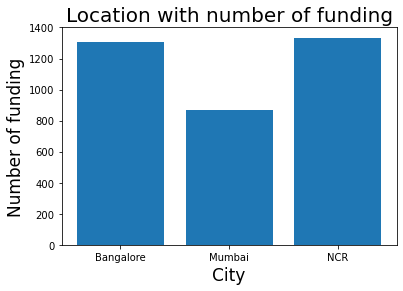

In [6]:
#solution
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("startup_funding.csv")
df = data.copy() # copy data in df
#droping na from CityLocation and InvestorsName
df.dropna(subset=["CityLocation"],inplace=True) 
df.dropna(subset=["InvestorsName"],inplace=True)
#define function for seprateCity name from CityLocation
def seprateCity(city):
    city = str(city)
    return city.split('/')[0].strip()
#replace "Delhi" with "New Delhi" in CityLocation
df["CityLocation"].replace("Delhi","New Delhi",inplace = True)
#replace "bangalore" with "Bangalore" in CityLocation
df["CityLocation"].replace("bangalore","Bangalore",inplace = True)
#appling the function seprateCity on df["CityLocation"] to modify the city names
df["CityLocation"] = df["CityLocation"].apply(seprateCity)
# define list x for location Bangalore,Mumbai,NCR
x = ["Bangalore","Mumbai","NCR"]
#define list y
y = []
for i in x:#itrate through loop in list x
    s = 0
    if i != "NCR": #if i is not NCR
        df_i = df[df["CityLocation"] == i].InvestorsName  #define df_i of investorName of city i
        for row in df_i:
            l = row
            if row != "Undisclosed Investors" and row != "Undisclosed investors": # check city name is not Undisclosed Investors
                l = row.split(",")
                s += len(l)
        y.append(s) #append in y number og
    else:#if i is  NCR
        #define df_i of investorName of city NCR(include city Gurgaon,Noida,New Dehli)
        df_i = df[ ( (df["CityLocation"] == "Gurgaon") | (df["CityLocation"] == "Noida") | (df["CityLocation"] == "New Delhi") )].InvestorsName
        for row in df_i:
            l = row
            if row != "Undisclosed Investors" and row != "Undisclosed investors":
                l = row.split(",")
                s += len(l) #count indivisal inverster for every city
        y.append(s)
for i in range(3):
    print(x[i],y[i])
plt.title("Location with number of funding",fontsize = 20)
plt.bar(x,y) #bar graph for x and y
plt.xlabel("City",fontsize = 17) #label for x-axies
plt.ylabel("Number of funding",fontsize = 17)#label for y-axies
plt.show() #show the graph

## Case Study 2 :  the top 5 investors who have invested maximum number of times In a startup.(consider repeat investments in one company also)

Top 5 Investors are:
Sequoia Capital 64
Accel Partners 53
Kalaari Capital 44
SAIF Partners 41
Indian Angel Network 40


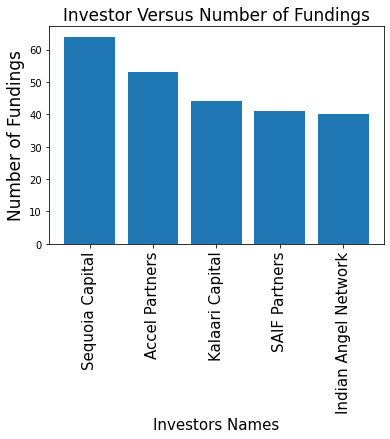

In [2]:
#solution
data = pd.read_csv("startup_funding.csv")
## copy file_data in df
df = data.copy()
#droping na form InvestorsName
df.dropna(subset=["InvestorsName"],inplace=True)
# extract only InvestorsName in df
df = df["InvestorsName"] 
d = {} #define dictionary
for row in df:
    if row != "Undisclosed Investors" and row != "Undisclosed investors":  #checking ever Inverstor name 
        l1 = row;
        l = row.strip(',').split(',') #strip and split InvestorsNamename for extract all investos
        for i in l:
            i = i.strip()
            if i in d:
                d[i] = d.get(i)+ 1
            else:
                d[i] = 1
Investors = [] #define list 
values = [] #define list
for row in d:
    Investors.append(row)
    values.append(d[row])
Investors = np.array(Investors) # define Investors as np array
values = np.array(values)# define values(Number of Fundings for every Investors )  as np array
Investors = Investors[np.argsort(values)[::-1]] # sort Investors list according to values
values = np.sort(values)[::-1] #dort values
print('Top 5 Investors are:')
for i in range(5): #print Top 5 Investors are
    print(Investors[i],values[i])
plt.bar(Investors[0:5],values[0:5])
plt.title('Investor Versus Number of Fundings',fontsize=17) #title of bar graph
plt.xticks(rotation=90,fontsize = 15) 
plt.ylabel("Number of Fundings",fontsize=17) #y axies label
plt.xlabel("Investors Names",fontsize = 15) # x xaies label
plt.show()

## Case Study 3:Top 5 investors who have invested maximum number of times in different companies

Top 5 Investors are:
Sequoia Capital 48
Accel Partners 47
Kalaari Capital 41
Indian Angel Network 40
Blume Ventures 36


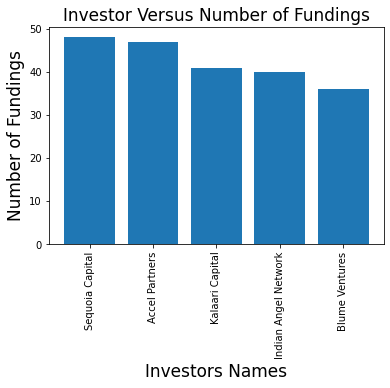

In [3]:
#solution
data = pd.read_csv("startup_funding.csv")
df = data.copy()
df["StartupName"].replace("Olacabs","Ola",inplace = True)# replace the startupName Olacabs as Ola
def func1(city): #define function  for handing the startup name error
    c = city.split("/")[0].strip()
    c = c.split(".")[0].strip()
    c = c.split(" ")[0].strip()
    return c
df.StartupName=df.StartupName.apply(func1) #apply funtion on StartupName for correct name
d = {} #define dictionary
startup = df["StartupName"] # extract startupname in startup_name
for i in startup:
    if i in d:
        d[i] += 1
    else:
        d[i] = 1
newd = {} 
for i in d:
    d1 = {}
    df_i = df[df["StartupName"] == i].InvestorsName #define df_i for extract InvestorsName in i
    for row in df_i:
        if row != "Undisclosed Investors" and row != "Undisclosed investors":
            l = str(row).strip(',').split(',')
            for i in l:
                i = i.strip()
                d1[i] = 1
    for row in d1:
        if row in newd:
            newd[row] += 1
        else:
            newd[row] = 1
Investors = []
values = []
for row in newd:
    Investors.append(row)
    values.append(newd[row])
Investors = np.array(Investors)
values = np.array(values)
Investors = Investors[np.argsort(values)[::-1]]
values = np.sort(values)[::-1]
print('Top 5 Investors are:')
for i in range(5):
    print(Investors[i],values[i])
plt.bar(Investors[0:5],values[0:5])
plt.xticks(rotation=90)
plt.title('Investor Versus Number of Fundings',fontsize=17)
plt.ylabel("Number of Fundings",fontsize = 17)
plt.xlabel("Investors Names",fontsize=17)
plt.show()

## Case Study 4: Top 5 Investors for Investment type- Seed Funding and Crowd Funding

Top 5 Investors for Investment type- Seed Funding and Crowd Funding are:
Indian Angel Network 33
Rajan Anandan 23
LetsVenture 16
Anupam Mittal 16
Kunal Shah 14


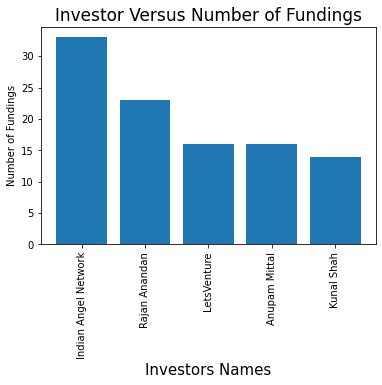

In [4]:
#solution
data = pd.read_csv("startup_funding.csv")
df = data.copy()
df.dropna(subset=["InvestmentType"],inplace=True) #drop na in InvestmentType
df.InvestmentType.replace("SeedFunding","Seed Funding",inplace=True) #correct the spelling of Seed Funding in InvestmentType
df.InvestmentType.replace("PrivateEquity","Private Equity",inplace=True)  #correct the spelling of Private Equity in InvestmentType
df.InvestmentType.replace("Crowd funding","Crowd Funding",inplace=True) #corrct the spelling of Crowd Funding in InvestmentType
#extract the data for only Seed Funding and Crowd Funding
df = df[ ( (df["InvestmentType"] == "Seed Funding" ) | (df["InvestmentType"] == "Crowd Funding" ) ) ] 
df["StartupName"].replace("Olacabs","Ola",inplace = True) # replace the startupName Olacabs as Ola
def func1(city):
    c = city.split("/")[0].strip()
    c = c.split(".")[0].strip()
    c = c.split(" ")[0].strip()
    return c
df.StartupName=df.StartupName.apply(func1) 
d = {}
startup = df["StartupName"]
for i in startup:
    if i in d:
        d[i] += 1
    else:
        d[i] = 1
newd = {}
for i in d:
    d1 = {}
    df_i = df[df["StartupName"] == i].InvestorsName
    for row in df_i:
        if row != "Undisclosed Investors" and row != "Undisclosed investors":
            l = str(row).strip(',').split(',')
            for i in l:
                i = i.strip()
                d1[i] = 1
    for row in d1:
        if row in newd:
            newd[row] += 1
        else:
            newd[row] = 1
Investors = []
values = []
for row in newd:
    Investors.append(row)
    values.append(newd[row])
Investors = np.array(Investors)
values = np.array(values)
Investors = Investors[np.argsort(values)[::-1]]
values = np.sort(values)[::-1]
print('Top 5 Investors for Investment type- Seed Funding and Crowd Funding are:')
for i in range(5):
    print(Investors[i],values[i])
plt.bar(Investors[0:5],values[0:5])
plt.xticks(rotation=90)
plt.title('Investor Versus Number of Fundings',fontsize=17)
plt.ylabel("Number of Fundings")
plt.xlabel("Investors Names",fontsize=15)
plt.show()

## Case Study 5: Top 5 Investors for Investment type- Private Equity


Top 5 Investors for Investment type- Private Equity are:
Sequoia Capital 46
Accel Partners 43
Kalaari Capital 35
Blume Ventures 27
SAIF Partners 24


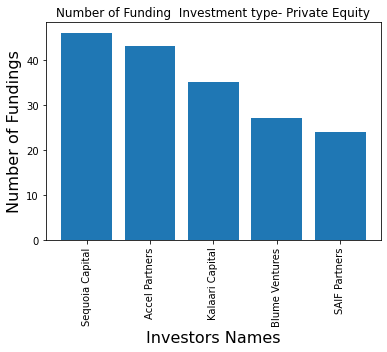

In [5]:
#solution
data = pd.read_csv("startup_funding.csv")
df = data.copy()
df.dropna(subset=["InvestmentType"],inplace=True)#drop na from Investment type
df.InvestmentType.replace("SeedFunding","Seed Funding",inplace=True) #correct the spelling of Seed Funding in InvestmentType
df.InvestmentType.replace("PrivateEquity","Private Equity",inplace=True)  #correct the spelling of Private Equity in InvestmentType
df.InvestmentType.replace("Crowd funding","Crowd Funding",inplace=True) #corrct the spelling of Crowd Funding in InvestmentType 
#extract the data for only Private Equity
df = df[(df["InvestmentType"] == "Private Equity" )  ]
df["StartupName"].replace("Olacabs","Ola",inplace = True) # replace the startupName Olacabs as Ola
def func1(city):
    c = city.split("/")[0].strip()
    c = c.split(".")[0].strip()
    c = c.split(" ")[0].strip()
    return c
df.StartupName=df.StartupName.apply(func1) 
d = {}
startup = df["StartupName"]
for i in startup:
    if i in d:
        d[i] += 1
    else:
        d[i] = 1
newd = {}
for i in d:
    d1 = {}
    df_i = df[df["StartupName"] == i].InvestorsName
    for row in df_i:
        if row != "Undisclosed Investors" and row != "Undisclosed investors":
            l = str(row).strip(',').split(',')
            for i in l:
                i = i.strip()
                d1[i] = 1
    for row in d1:
        if row in newd:
            newd[row] += 1
        else:
            newd[row] = 1
Investors = []
values = []
for row in newd:
    Investors.append(row)
    values.append(newd[row])
Investors = np.array(Investors)
values = np.array(values)
Investors = Investors[np.argsort(values)[::-1]]
values = np.sort(values)[::-1]
print('Top 5 Investors for Investment type- Private Equity are:')
for i in range(5):
    print(Investors[i],values[i])
plt.bar(Investors[0:5],values[0:5])
plt.xticks(rotation=90)
plt.title("Number of Funding  Investment type- Private Equity")
plt.ylabel("Number of Fundings",fontsize=16)
plt.xlabel("Investors Names",fontsize = 16)
plt.show()